<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제2장 회귀분석

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/women.csv', header=0, index_col=0)
data

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129
7,64,132
8,65,135
9,66,139
10,67,142


In [13]:
x = data['height']
y = data['weight']
fit = ols('y ~ x', data=data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.09e-14
Time:                        17:30:51   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.5167      5.937    -14.741      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
print(fit.params)

Intercept   -87.516667
x             3.450000
dtype: float64


In [15]:
fit.params.Intercept

-87.51666666666733

In [16]:
fit.params.x

3.450000000000011

In [17]:
fit.fittedvalues

,0
1,112.583333
2,116.033333
3,119.483333
4,122.933333
5,126.383333
6,129.833333
7,133.283333
8,136.733333
9,140.183333
10,143.633333


In [18]:
fit.resid

,0
1,2.416667
2,0.966667
3,0.516667
4,0.066667
5,-0.383333
6,-0.833333
7,-1.283333
8,-1.733333
9,-1.183333
10,-1.633333


In [19]:
fit.resid.mean()

-3.600083194517841e-14

In [20]:
fit.predict(exog=dict(x=65))

,0
0,136.733333


In [21]:
data.iloc[9,1]

142

In [22]:
fit.predict(exog=dict(x=67)).values

array([143.63333333])

In [23]:
fit.params.Intercept + fit.params.x *67

143.63333333333338

In [24]:
relative_error = (data.iloc[9,1] - fit.predict(exog=dict(x=67)).values)/data.iloc[9,1]*100
print(abs(relative_error))

[1.15023474]


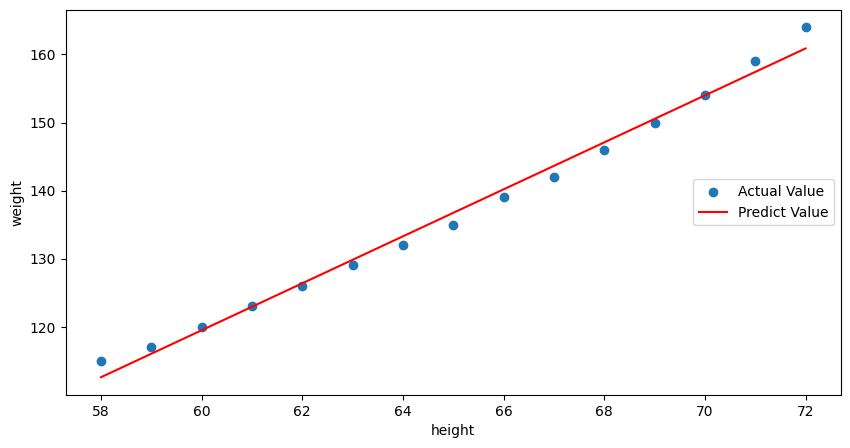

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, fit.fittedvalues, 'r')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend(('Actual Value','Predict Value'), loc='center right')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/women.csv', header=0, index_col=0)
data.head()

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126


In [28]:
x = data['height'].values.reshape(-1,1)
x[0:5]

array([[58],
       [59],
       [60],
       [61],
       [62]])

In [29]:
y = data['weight']
fit = LinearRegression().fit(x,y)
fit.intercept_

-87.51666666666657

In [30]:
fit.coef_

array([3.45])

In [31]:
fit.predict(x)

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

In [32]:
residual = y - fit.predict(x)
residual

,weight
1,2.416667
2,0.966667
3,0.516667
4,0.066667
5,-0.383333
6,-0.833333
7,-1.283333
8,-1.733333
9,-1.183333
10,-1.633333


In [33]:
residual.mean()

3.789561257387201e-15

In [34]:
data.iloc[9,1]

142

In [37]:
fit.predict([[67]])

array([143.63333333])